In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import statsmodels.api as sm # Esta librería obtiene el valor de las columnas o variables que tienen el mayor índice de predictividad
from sklearn import tree
import graphviz

Este es un conjunto de datos con información de 2,240 clientes que recibieron una campaña de Marketing. Algunas de las columnas más importantes son las siguientes:

- ID = Identificador único del cliente.
- Year_Birth = Año de nacimiento del cliente.
- Education = Nivel de educación del cliente.
- Marital_Status = Estado civil del cliente.
- Income = Ingreso familiar anual del cliente.
- Kidhome = Número de niños en el hogar del cliente.
- Teenhome = Número de adolescentes en el hogar del cliente.
- Dt_Customer = Fecha de inscripción del cliente en la empresa.
- Recency = Número de días desde la última compra.
- MntWines = Cantidad de vino consumido en los últimos dos años.
- MntFruits = Cantidad de fruta consumida en los últimos dos años.
- MntMeatProducts = Cantidad de carne consumida en los últimos dos años.
- MntFishProducts = Cantidad de pescado consumido en los últimos dos años.
- MntSweetProductos = Cantidad de dulces consumidos en los últimos dos años.
- MntGoldProds = Cantidad de oro consumidos en los últimos dos años.
- NumDealsPurchases = Número de compras realizadas con descuentos.
- NumWebPurchases = Número de compras realizadas en la página web.
- NumCatalogPurchases = Número de compras realizadas por catálogo.
- NumStorePurchases = Número de compras realizadas directamente en la tienda.
- NumWebVisitsMonth = Número de visitas a la página web en el último mes.
- AcceptedCmp3 = 1 si el cliente aceptó la oferta en la tercera campaña.
- AcceptedCmp4 = 1 si el cliente aceptó la oferta en la cuarta campaña.
- AcceptedCmp5 = 1 si el cliente aceptó la oferta en la quinta campaña.
- AcceptedCmp1 = 1 si el cliente aceptó la oferta en la primera campaña.
- AcceptedCmp2 = 1 si el cliente aceptó la oferta en la segunda campaña.
- Response = 1 si el cliente aceptó la oferta en la última campaña.
- Complain = 1 si el cliente se quejó en los últimos dos años.
- Country = Ubicación del cliente.

In [4]:
df= pd.read_csv("datasets/marketing_data.csv")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,01/11/2014,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,01/11/2014,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [5]:
# Analizamos los clientes que compraron en mas de una campaña
df["Compras Totales"] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Compras Totales
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,1
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,2
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,...,7,0,0,0,0,0,0,0,AUS,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,...,7,1,0,0,0,0,1,0,SP,2


In [11]:
# Vamos a crear una nueva columna llamada "Engaged" en la que ubicaremos a los clientes que sí compraron a raíz de cualquiera de las campañas de marketing.
df["Engaged"] = df["Compras Totales"].apply(lambda x: 0 if x == 0 else 1)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Compras Totales,Engaged
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,1,1
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,2,1
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,...,0,0,0,0,0,0,0,AUS,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,...,1,0,0,0,0,1,0,SP,2,1
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,0,0,0,0,0,1,0,SP,1,1
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,1,0,0,0,0,1,0,GER,2,1
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,0,0,0,0,0,0,0,SP,0,0
8,4047,1954,PhD,Married,"$65,324.00",0,1,01/11/2014,0,384,...,0,0,0,0,0,0,0,US,0,0
9,9477,1954,PhD,Married,"$65,324.00",0,1,01/11/2014,0,384,...,0,0,0,0,0,0,0,IND,0,0


In [12]:
# Utilizo las variables continuas
continuous_vars = ["Kidhome", "Teenhome", "Recency", "MntWines",
                  "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                  "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
                  "NumWebVisitsMonth","Complain"]

In [13]:
# Da una idea de cuáles variables influyen más en la probabilidad de que un cliente esté comprometido (Engaged) y cuán fiables son estas estimaciones.
logit = sm.Logit(df["Engaged"], df[continuous_vars])
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.471580
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2225
Method:                           MLE   Df Model:                           14
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.1940
Time:                        13:27:06   Log-Likelihood:                -1056.3
converged:                       True   LL-Null:                       -1310.7
Covariance Type:            nonrobust   LLR p-value:                 1.369e-99
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Kidhome                -0.1977      0.133     -1.483      0.138      -0.459       0.064
Teenhome               -0.7590      0.124     -6.131      0.000      -1.002      -0.516
Recency                -0.0150      0.002     -8.204      0.000      -0.019      -0.011
MntWines                0.0036      0.000     13.427      0.000       0.003       0.004
MntFruits              -0.0037      0.002     -2.027      0.043      -0.007      -0.000
MntMeatProducts         0.0007      0.000      1.890      0.059   -2.53e-05       0.001
MntFishProducts        -0.0019      0.001     -1.391      0.164      -0.005       0.001
MntSweetProducts        0.0005      0.002      0.315      0.752      -0.003       0.004
MntGoldProds            0.0021      0.001      1.820      0.069      -0.000       0.004
NumDealsPurchases       0.0167      0.035      0.480      0.631      -0.051       0.085
NumWebPurchases         0.0241      0.025      0.976      0.329      -0.024       0.072
NumCatalogPurchases     0.0262      0.029      0.911      0.362      -0.030       0.083
NumStorePurchases      -0.2092      0.022     -9.305      0.000      -0.253      -0.165
NumWebVisitsMonth      -0.0112      0.023     -0.496      0.620      -0.055       0.033
Complain               -0.4131      0.664     -0.622      0.534      -1.714       0.888
=======================================================================================
"""

In [14]:
# Podemos observar que las variables que mayor poder de predictividad y que mayor relación tienen con la variable de salida son "Teenhome", "Recency", "MntWines" y "NumStorePurchases". Estas variables se ubicaron porque tienen un valor de P menor a 0.05.
variables = ["Recency", "NumStorePurchases", "Teenhome", "MntWines"]
target = ["Engaged"]

In [16]:
# Entrenamos el modelo
dt_model = tree.DecisionTreeClassifier(max_depth =4)
dt_model.fit(df[variables], df[target])

DecisionTreeClassifier(max_depth=4)

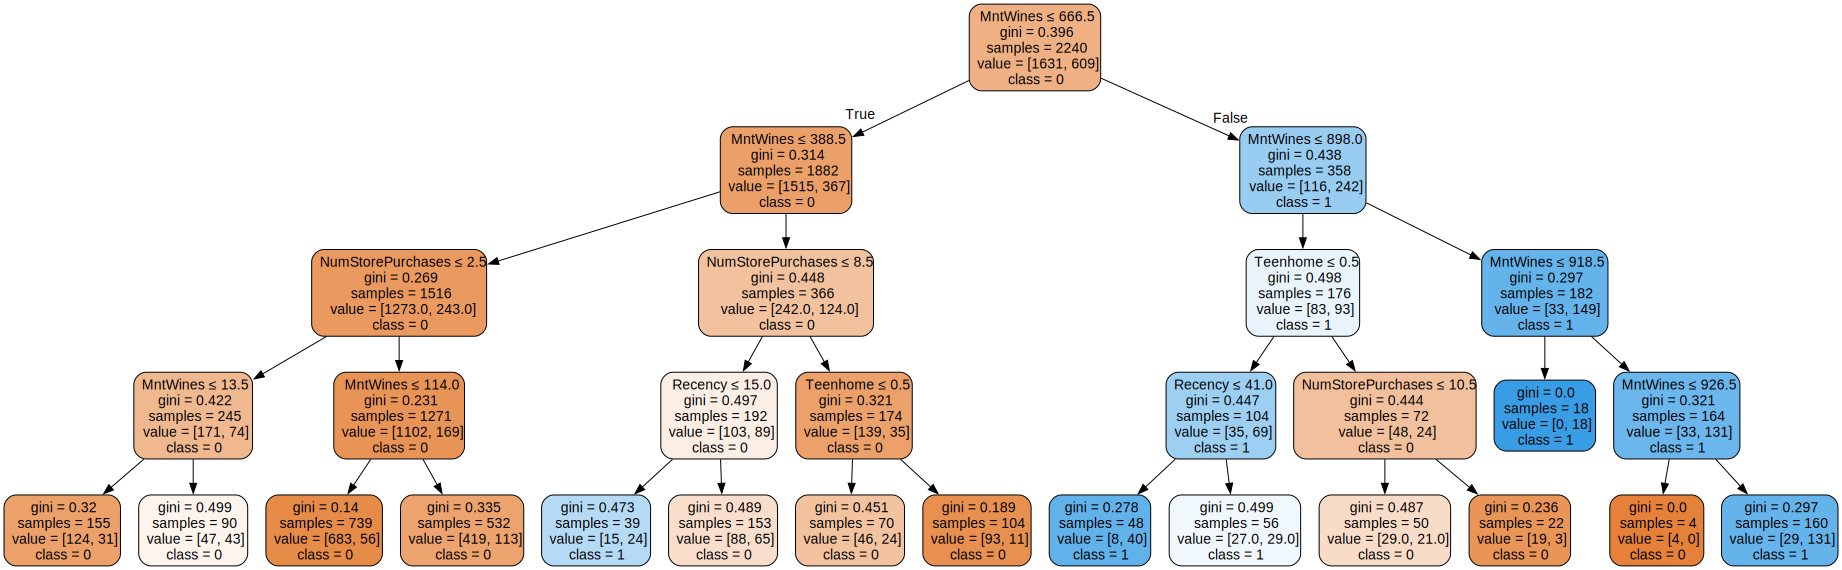

In [ ]:
# Imprimimos nuestro árbol
dot_data = tree.export_graphviz(dt_model, feature_names = variables, class_names = ["0", "1"], filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph
# Aquí podemos detectar que las ramas que llegan a "class = 1" son los clientes que tienen una alta probabilidad de compra a raíz de nuestras campañas de marketing.

Conclusiones y resultados:
Hemos notado 4 tipos de clientes que han aceptado nuestras ofertas. Esto lo podemos denotar de las hojas inferiores que tienen la variable "class" igual a 1
- Cliente 1: MntWines entre 388.5 y 666.5 , Recency < 15 , NumStorePurchases < 8 , Teenhome
- Cliente 2: MntWines entre 666.5 y 898.5 , Recency < 41 , Teenhome < 0.5
- Cliente 3: MntWines > 926.5
- Cliente 4: MntWines entre 666.5 y 898 , Recency > 41 , Teenhome < 0.5